# Car License Plate Detection Based on OpenCV



### Extract Car License Plate



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Locate Pos
import cv2
from matplotlib import pyplot as plt
def show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()
#彩色图片
def plt_show_color(img):
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()
#灰度图
def plt_show_gray(img):
    plt.imshow(img,cmap='gray')
    plt.show()

In [7]:
os.chdir("drive/My Drive/img")

NameError: ignored

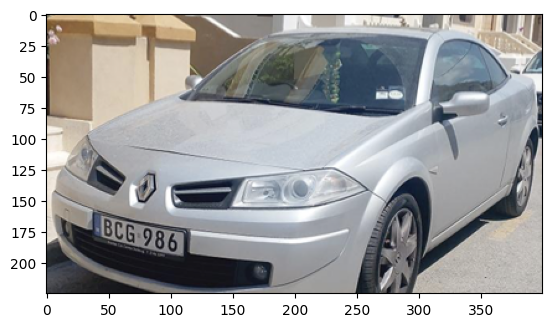

In [10]:
rawimg=cv2.imread("drive/My Drive/img/Cars430.png")
plt_show_color(rawimg)
#normal Cars1
#tilted Cars430

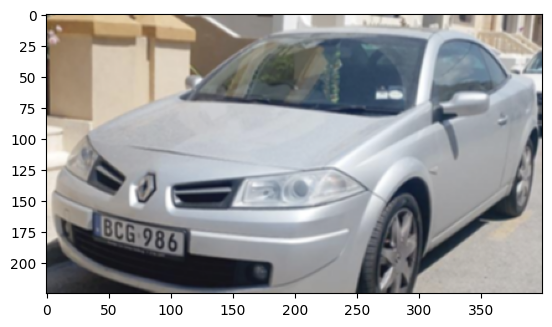

In [11]:
img_blur=cv2.GaussianBlur(rawimg,(3,3),0)
plt_show_color(img_blur)

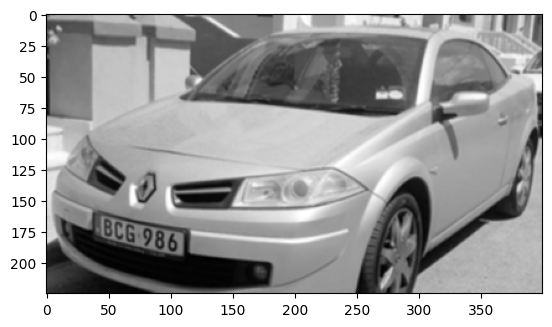

In [12]:
gray_img=cv2.cvtColor(img_blur,cv2.COLOR_RGB2GRAY)
plt_show_gray(gray_img)

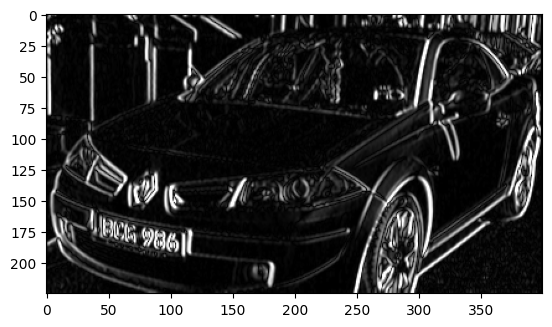

In [13]:
Sobel_x=cv2.Sobel(gray_img,cv2.CV_16S,1,0)
absX=cv2.convertScaleAbs(Sobel_x)
img_sobel=absX
plt_show_gray(img_sobel)

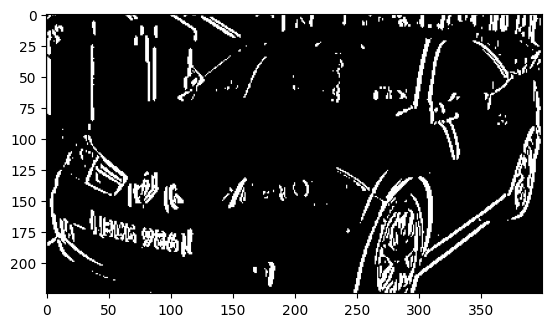

In [14]:
ret,img_th=cv2.threshold(img_sobel,0,255,cv2.THRESH_OTSU)
plt_show_gray(img_th)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


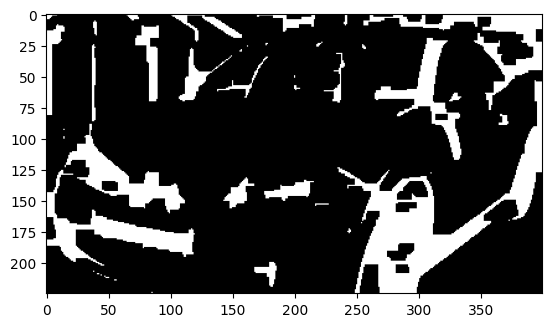

In [15]:
kernelX=cv2.getStructuringElement(cv2.MORPH_RECT,(10,5))
print(kernelX)
img_ker=cv2.morphologyEx(img_th,cv2.MORPH_CLOSE,kernelX,iterations=1)
plt_show_gray(img_ker)

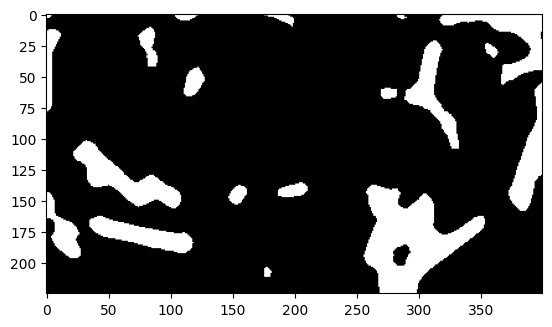

In [16]:
img_output=cv2.medianBlur(img_ker,15)
plt_show_gray(img_output)

In [17]:
img_output.shape

(225, 400)

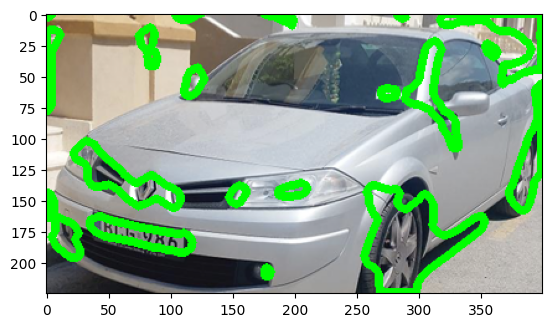

In [18]:
contours,hierarchy=cv2.findContours(img_output,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_cpy=rawimg.copy()
cv2.drawContours(img_cpy,contours,-1,(0,255,0),5)
plt_show_color(img_cpy)

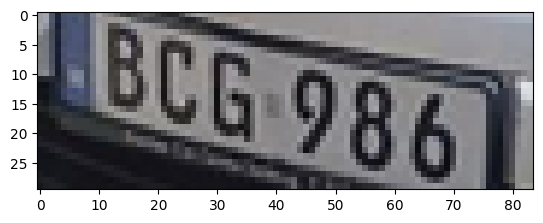

In [19]:
for item in contours:
    rect=cv2.boundingRect(item)
    x=rect[0]
    y=rect[1]
    weight=rect[2]
    height=rect[3]
    if(weight>(height*2.5)) and (weight<(height*6)) and (weight>50):
        Plates=rawimg[y:y+height,x:x+weight]
        plt_show_color(Plates)

1


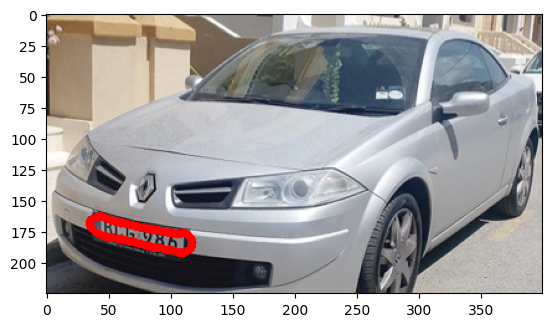

In [20]:
for index,item in enumerate(contours):
    rect=cv2.boundingRect(item)
    x=rect[0]
    y=rect[1]
    weight=rect[2]
    height=rect[3]
    if(weight>(height*2.5)) and (weight<(height*6)) and (weight>50):
        print(index)
        img_cpy2=rawimg.copy()
        cv2.drawContours(img_cpy2,contours,1,(0,0,255),5)
        plt_show_color(img_cpy2)

[array([0.97634894], dtype=float32), array([0.21620066], dtype=float32), array([74.59259], dtype=float32), array([177.25926], dtype=float32)]
[0.2214379] [160.74164]
(400, array([249.3168], dtype=float32))
(0, array([160.74164], dtype=float32))


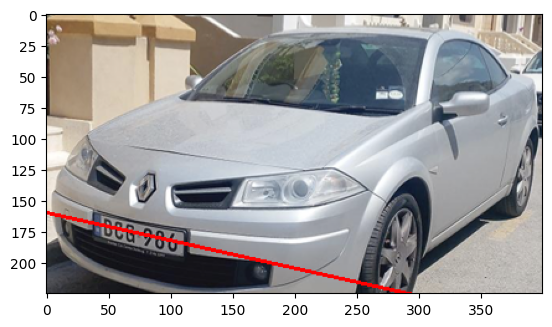

In [27]:
cnt=contours[1]
img_cpy3=rawimg.copy()
h,w=img_cpy3.shape[:2]
[vx,vy,x,y]=cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0.01)
print([vx,vy,x,y])
k=vy/vx
b=y-k*x
print(k,b)
ly=b
ry=k*w+b
print((w,ry))
print((0,ly))

ry1=ry[0].astype(int)
ly1=ly[0].astype(int)
img_line=cv2.line(img_cpy3,(w,ry1),(0,ly1),(0,0,255),2)
plt_show_color(img_line)

In [28]:
import math
tan=math.atan(k)
tan=math.degrees(tan)

225 400


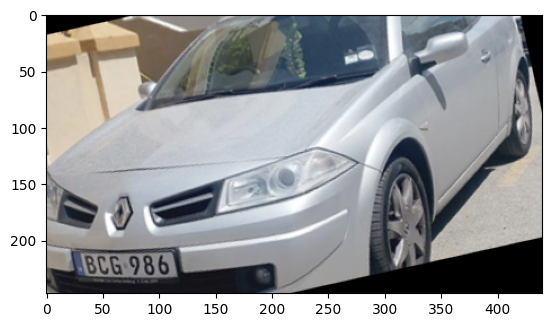

In [29]:
img_cpy4=rawimg.copy()
h,w=img_cpy.shape[:2]
print(h,w)
M=cv2.getRotationMatrix2D((w/2,h/2),tan,1.2)
img_tilt=cv2.warpAffine(img_cpy4,M,(int(w*1.1),int(h*1.1)))
plt_show_color(img_tilt)

### Extract Char in Plates

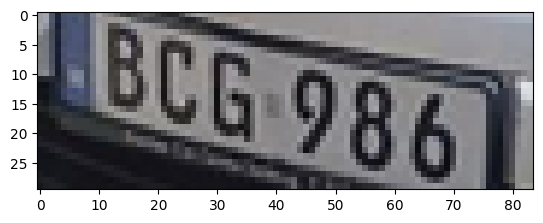

In [30]:
rawpla=Plates
plt_show_color(rawpla)

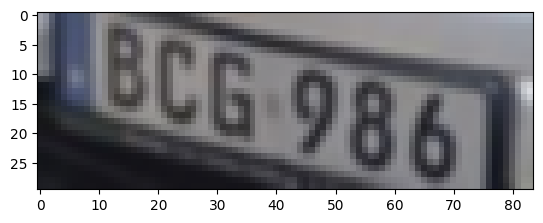

In [31]:
pla_blur=cv2.GaussianBlur(rawpla,(3,3),0)
plt_show_color(pla_blur)

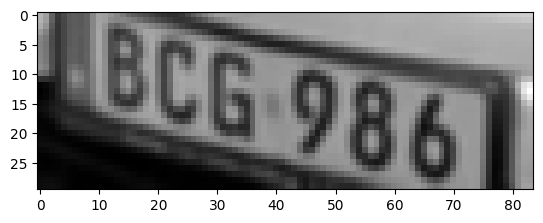

In [32]:
gray_pla=cv2.cvtColor(pla_blur,cv2.COLOR_RGB2GRAY)
plt_show_gray(gray_pla)

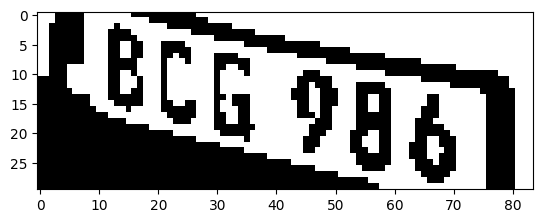

In [33]:
ret,pla_th=cv2.threshold(gray_pla,0,255,cv2.THRESH_OTSU)
plt_show_gray(pla_th)

(30, 84)


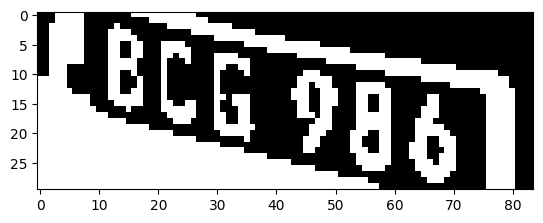

In [34]:
area_white=0
area_black=0
h,w=pla_th.shape
print(pla_th.shape)
for i in range(h):
    for j in range(w):
        if pla_th[i,j]==255:
            area_white+=1
        else:
            area_black+=1
if(area_white>area_black):
    ret,pla_white=cv2.threshold(gray_pla,0,255,cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    plt_show_gray(pla_white)

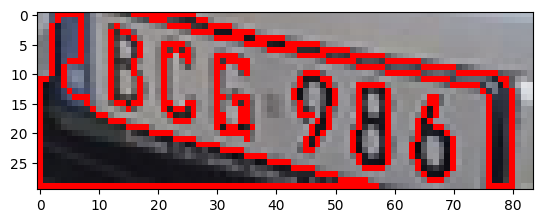

In [35]:
contours,hierarchy=cv2.findContours(pla_white,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
pla_cpy=rawpla.copy()
cv2.drawContours(pla_cpy,contours,-1,(0,0,255),1)
plt_show_color(pla_cpy)

[[0, 0, 58, 30], [12, 2, 6, 15], [16, 0, 65, 30], [21, 5, 6, 14], [30, 7, 7, 15], [43, 10, 8, 14], [53, 12, 7, 15], [63, 14, 8, 15]]


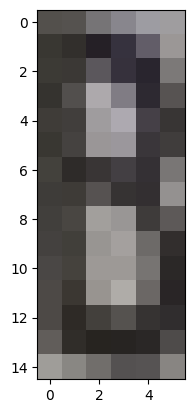

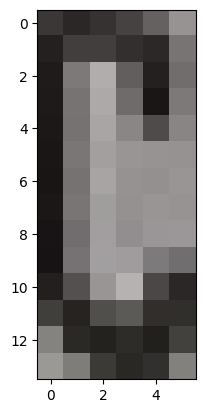

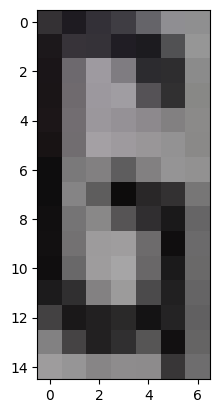

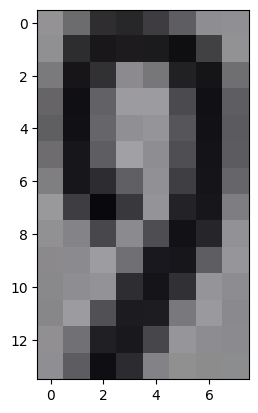

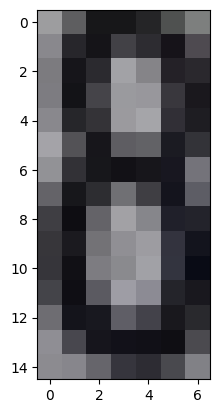

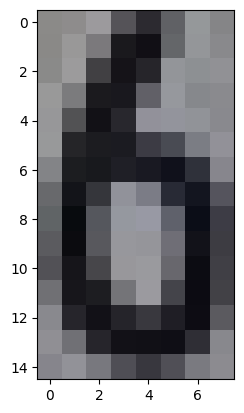

[12, 2, 6, 15]

In [36]:
words=[]
for item in contours:
    word=[]
    rect=cv2.boundingRect(item)
    x=rect[0]
    y=rect[1]
    w=rect[2]
    h=rect[3]
    word.append(x)
    word.append(y)
    word.append(w)
    word.append(h)
    words.append(word)
words=sorted(words,key=lambda s:s[0],reverse=False)
print(words)
i=0
qual=[]
for word in words:
    if(word[3]>(word[2]*1.5)) and (word[3]<(word[2]*3)) and (word[2]>3) and (word[3]>3):
        i+=1
        qual.append(word)
        pla_spr=rawpla[word[1]:word[1]+word[3],word[0]:word[0]+word[2]]
        plt_show_color(pla_spr)
qual[0]